In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
authors = pd.read_csv('../results/post-aggregation/author_200000.csv.gzip', compression='gzip')

# Exploring Distributions

In [4]:
authors.describe()

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,own_message,forwarded_message,total_message_count,own_message_count,forwarded_message_count,action_quotient,sentiment_quotient
count,1.636600e+04,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,13735.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16366.000000,16366.000000,16366.000000,16366.000000,16366.000000,8109.000000,9571.000000
mean,2.190636e+16,19.338288,12.214535,3.863033,0.198274,0.406920,0.335572,0.000061,0.999939,2.558300,19.331691,6.046145,4.642769,0.218317,0.208135,0.412029,71.162120,0.026190,0.005829,0.013529,0.024274,0.062771,0.998183,0.000306,12.233900,6.194244,6.029085,3.418871,0.309119
std,5.352948e+18,160.904784,74.118929,29.887315,0.330120,0.407238,0.395163,0.007821,0.007821,2.683272,34.291200,5.487764,1.834901,0.745965,0.505436,1.053924,17.164149,0.050313,0.020012,0.035099,0.040754,0.115136,0.036691,0.017477,501.411899,36.130599,500.179061,3.215744,0.579849
min,-9.222479e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.663013e+18,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,4.224759,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.500000,0.000000
50%,2.354336e+16,3.000000,2.000000,0.000000,0.000000,0.333333,0.166667,0.000000,1.000000,2.000000,11.000000,5.186275,4.942308,0.000000,0.000000,0.000000,73.400000,0.000000,0.000000,0.000000,0.000000,0.031496,1.000000,0.000000,1.000000,1.000000,0.000000,2.714286,0.000000
75%,4.669354e+18,11.000000,7.000000,2.000000,0.285714,0.833333,0.571429,0.000000,1.000000,3.000000,21.333333,7.875613,5.500000,0.047619,0.200000,0.625000,82.500000,0.034791,0.000000,0.011451,0.034483,0.076923,1.000000,0.000000,3.000000,3.000000,0.000000,4.333333,0.500000
max,9.222832e+18,13151.000000,5316.000000,2276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,690.000000,150.766667,25.000000,32.000000,12.000000,57.000000,99.950000,1.000000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,59126.000000,2944.000000,59126.000000,56.000000,10.000000


In [5]:
authors.head()

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,final_message,final_message_string,own_message,forwarded_message,total_message_count,own_message_count,forwarded_message_count,action_quotient,sentiment_quotient,avg_flesch_reading_ease_class
0,-9.222479e+18,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.0,1.000000,7.000000,7.000000,7.857143,0.000000,0.0,0.0,NaN,0.00,0.0,0.000000,0.000000,0.000000,"<a href="""" onclick='return ShowBotCommand(""rul...","<a href="""" onclick='return ShowBotCommand(""rul...",1.0,0,1,1,0,NaN,NaN,unclassified
1,-9.221917e+18,2.0,1.0,0.0,0.000000,0.5,0.500000,0.0,1.0,1.500000,4.000000,2.500000,6.833333,0.000000,0.5,0.0,29.745000,0.00,0.0,0.000000,0.000000,0.000000,Die Satansanbeter Bissle weit hergeholt...,Die Satansanbeter Bissle weit hergeholt jetzt...,1.0,0,2,2,0,NaN,0.0,very confusing
2,-9.221881e+18,11.0,1.0,1.0,0.333333,0.0,0.666667,0.0,1.0,1.666667,7.666667,6.111111,6.119048,0.666667,0.0,1.0,49.483333,0.00,0.0,0.000000,0.047619,0.255952,Heiko Schrang und seine Irreführung! Mehr Info...,Heiko Schrang und seine Irreführung! Mehr Info...,1.0,0,3,3,0,1.000000,NaN,difficult
3,-9.221861e+18,11.0,6.0,5.0,0.000000,0.0,1.000000,0.0,1.0,2.500000,35.500000,14.333333,5.308943,0.000000,0.0,0.5,50.700000,0.05,0.0,0.017857,0.042857,0.055357,Ich bekomme wieder einmal meine Intuitionen be...,Ich bekomme wieder einmal meine Intuitionen be...,1.0,0,2,2,0,1.200000,NaN,fairly difficult
4,-9.217274e+18,30.0,10.0,14.0,0.000000,0.0,1.000000,0.0,1.0,8.000000,150.000000,18.750000,5.846667,0.000000,0.0,0.0,50.850000,0.00,0.0,0.006944,0.062500,0.069444,"""Der Herr der Ringe"" Die Gefährten Am 111. Ge...","""Der Herr der Ringe"" Die Gefährten Am 111. Geb...",1.0,0,1,1,0,0.714286,NaN,fairly difficult


In [6]:
cols = authors.columns[1:-10].append(authors.columns[-8:-6].append(authors.columns[-5:]))
cols

Index(['noun_count', 'verb_count', 'adj_count', 'positive_sentiment',
       'negative_sentiment', 'neutral_sentiment', 'channel_messages',
       'group_messages', 'sent_count', 'word_count', 'avg_sent_length',
       'avg_word_length', 'exclamation_count', 'question_count', 'emoji_count',
       'flesch_reading_ease', 'liwc_I', 'liwc_We', 'liwc_You', 'liwc_Other',
       'liwc_Affect', 'own_message', 'forwarded_message', 'own_message_count',
       'forwarded_message_count', 'action_quotient', 'sentiment_quotient',
       'avg_flesch_reading_ease_class'],
      dtype='object')

In [9]:
set(authors.avg_flesch_reading_ease_class.values)

{'difficult',
 'easy',
 'fairly difficult',
 'fairly easy',
 'standard',
 'unclassified',
 'very confusing',
 'very easy'}

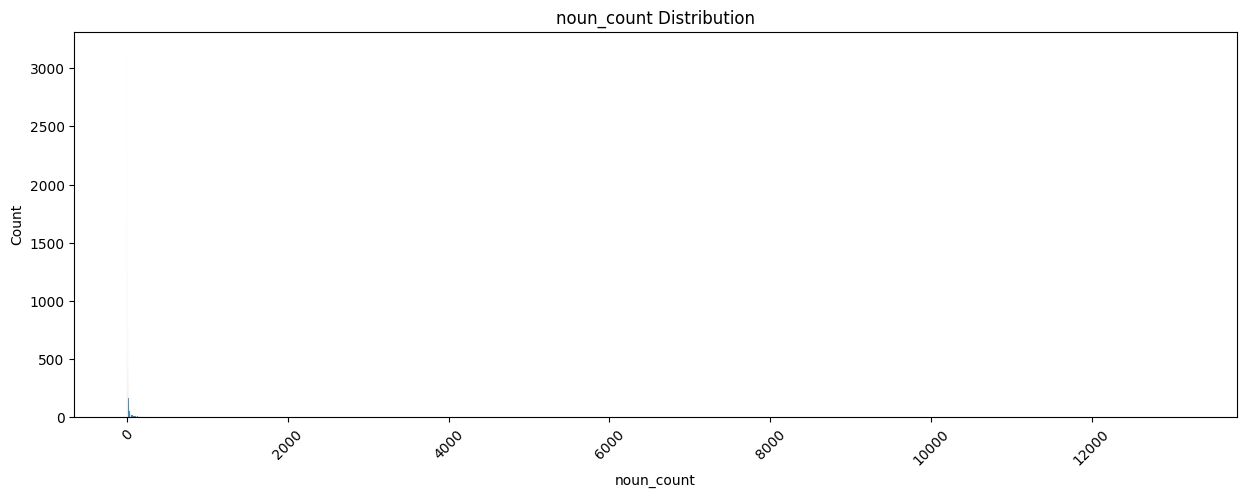

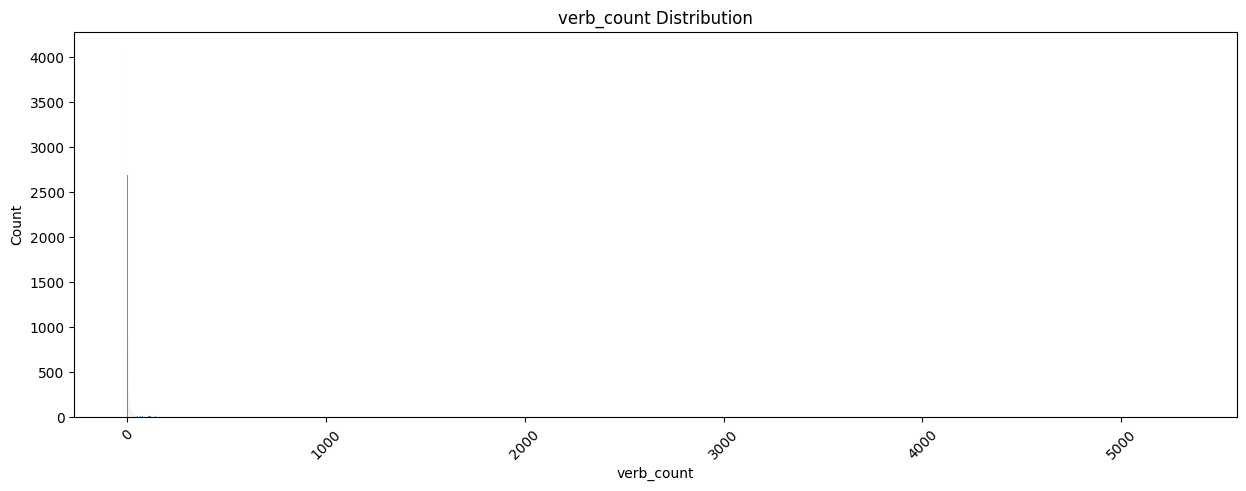

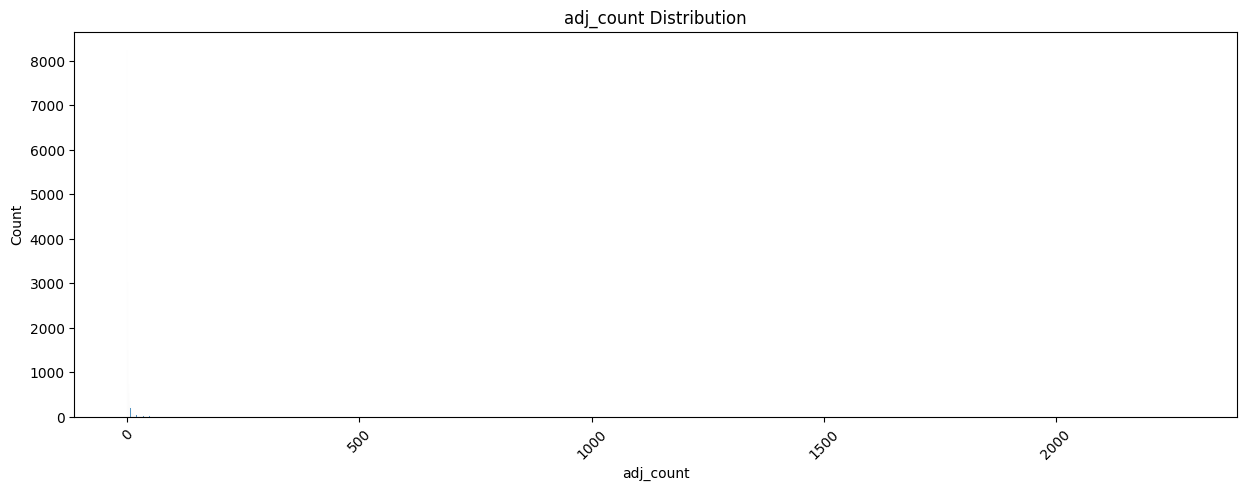

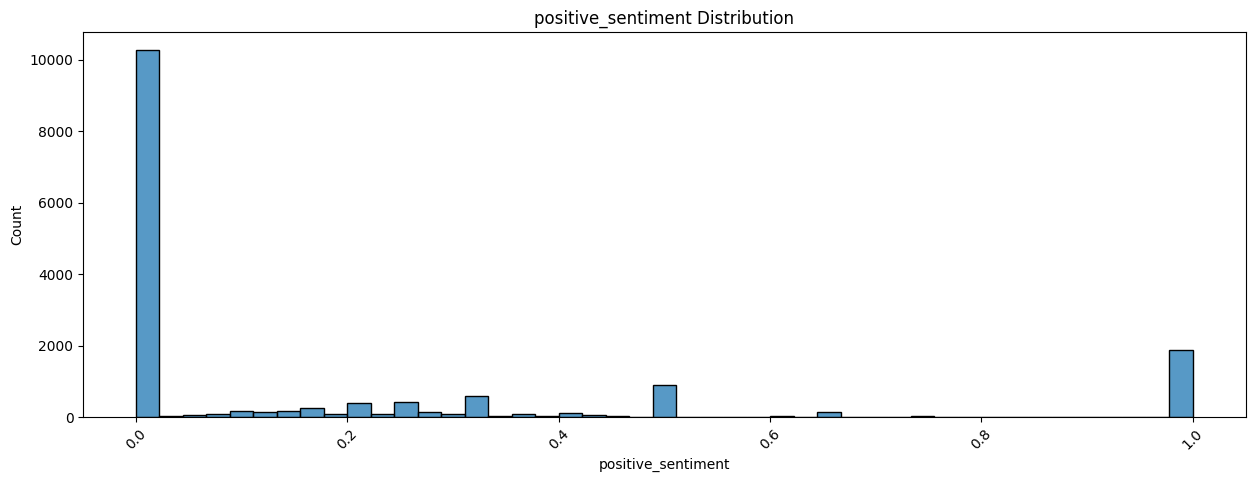

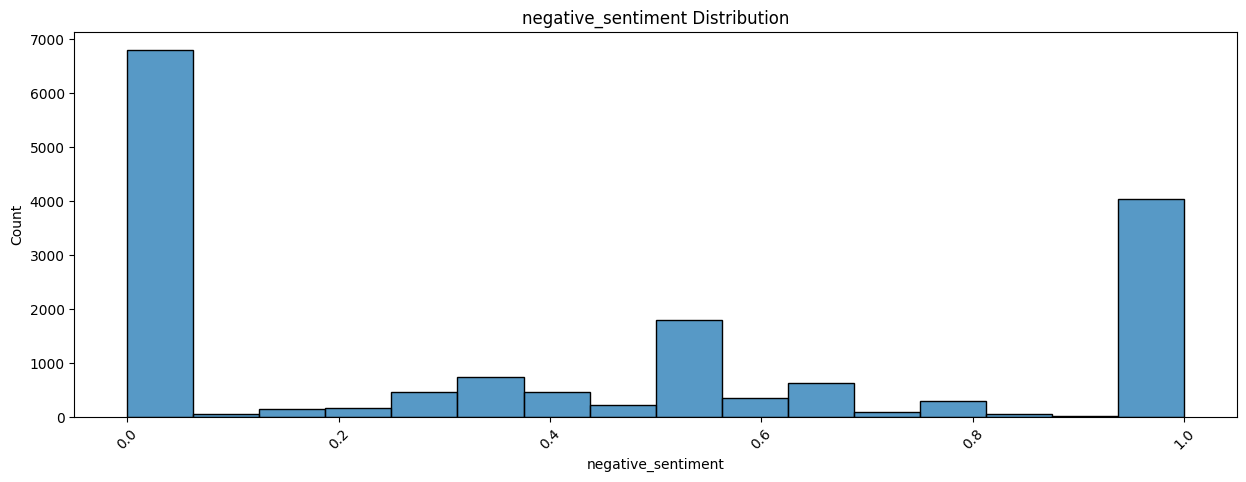

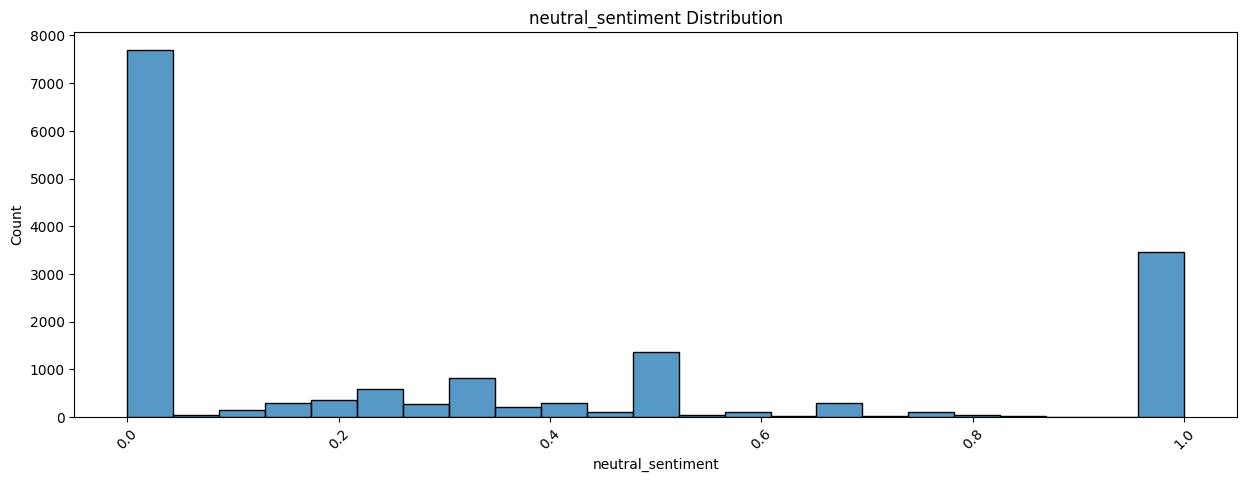

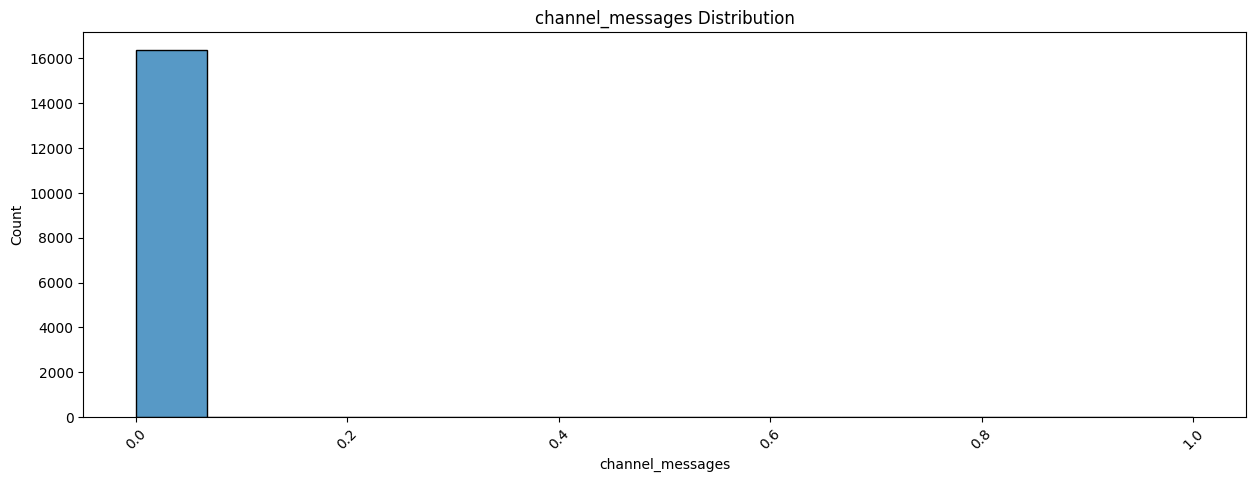

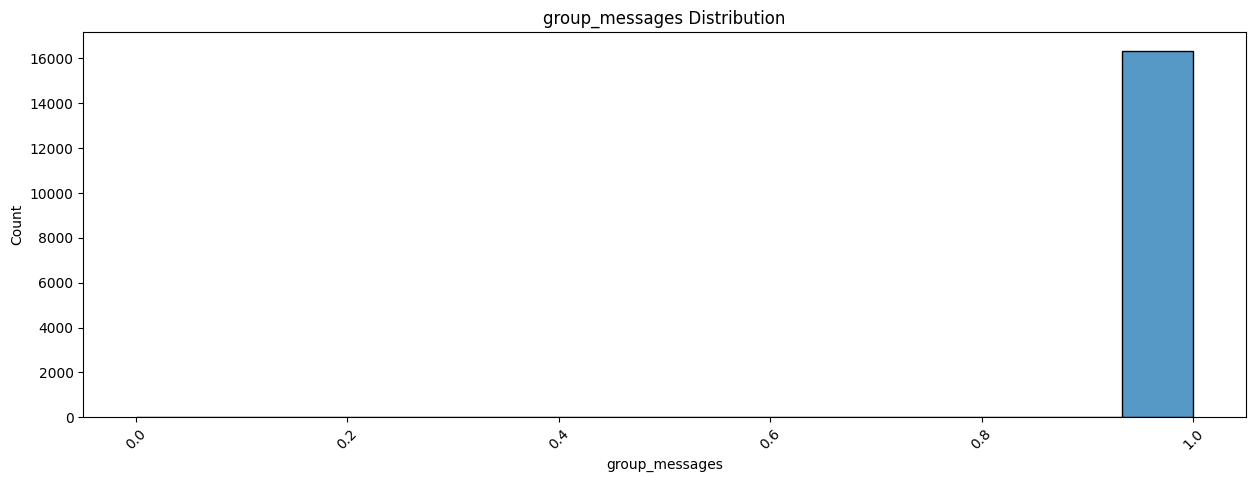

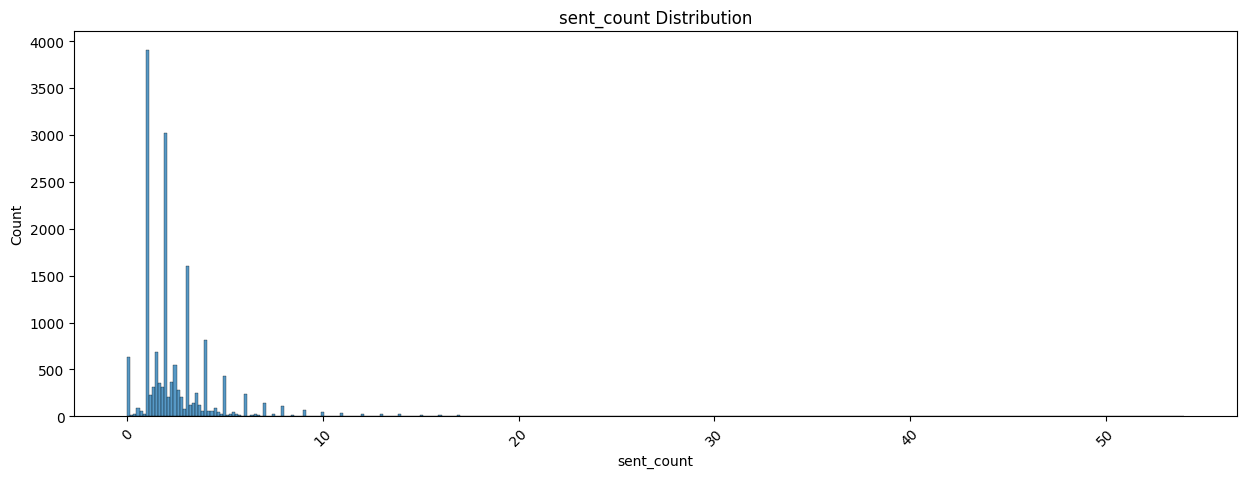

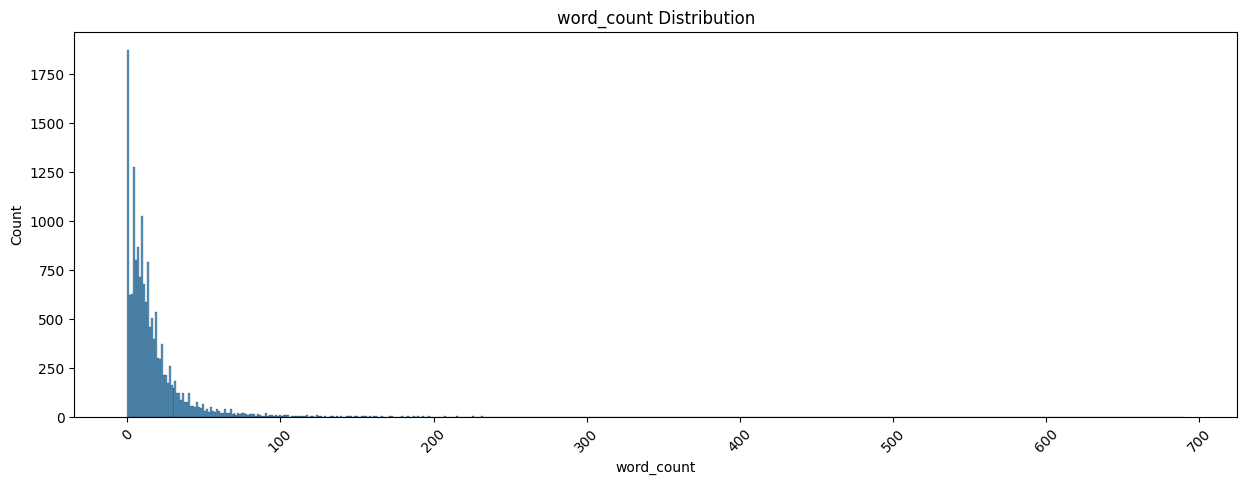

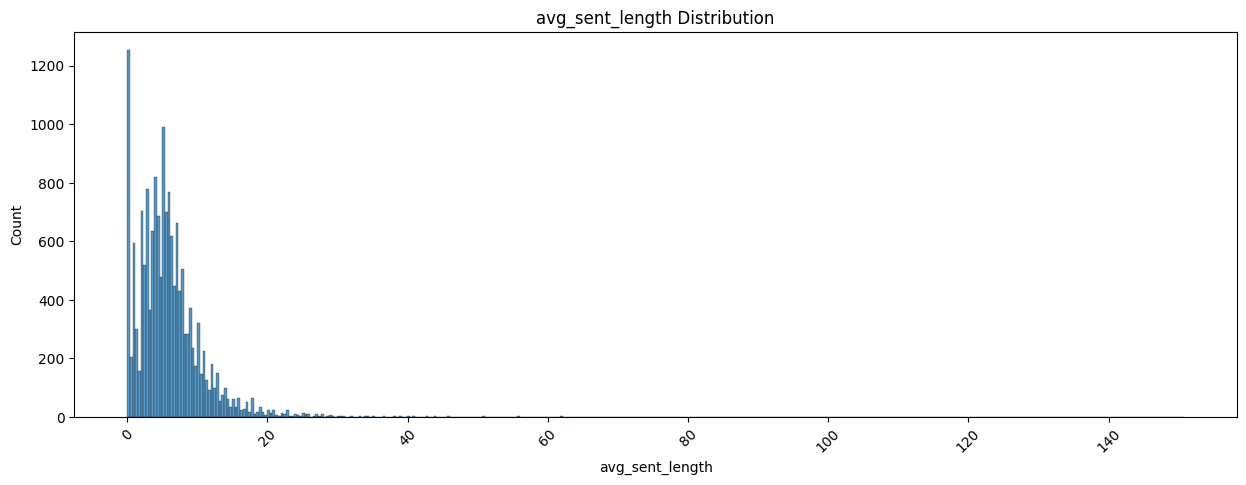

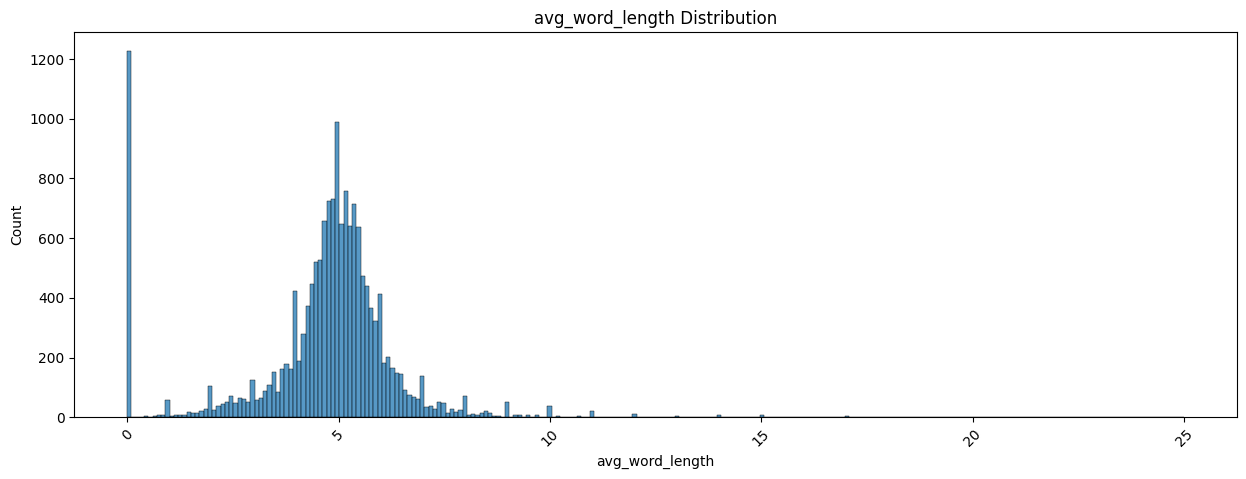

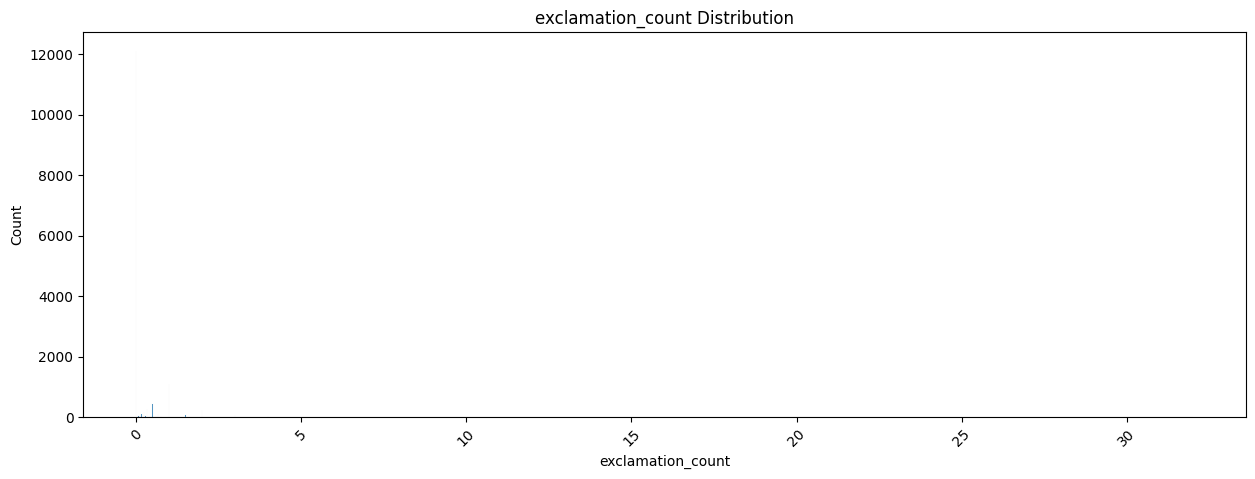

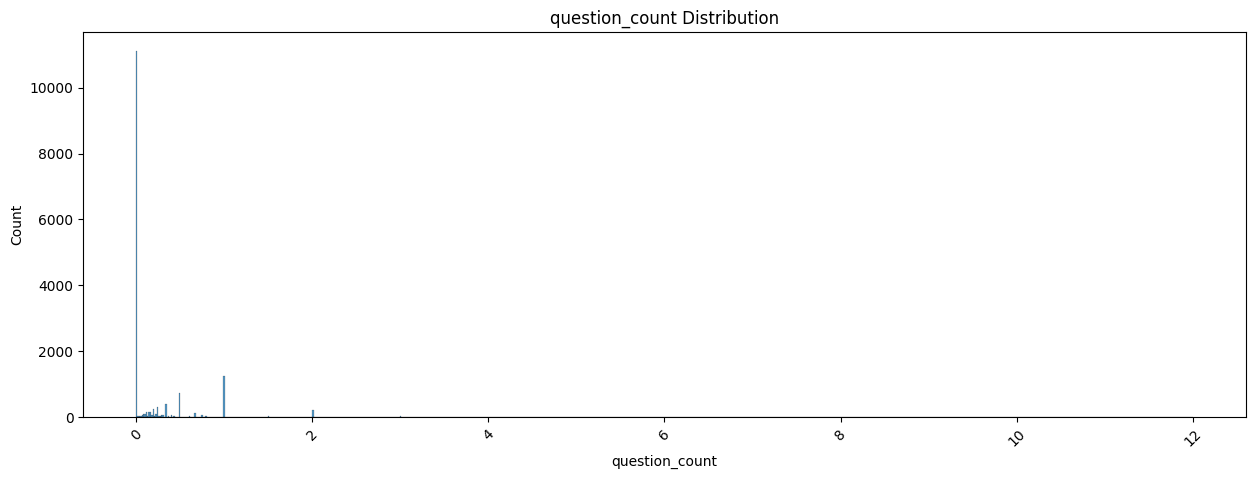

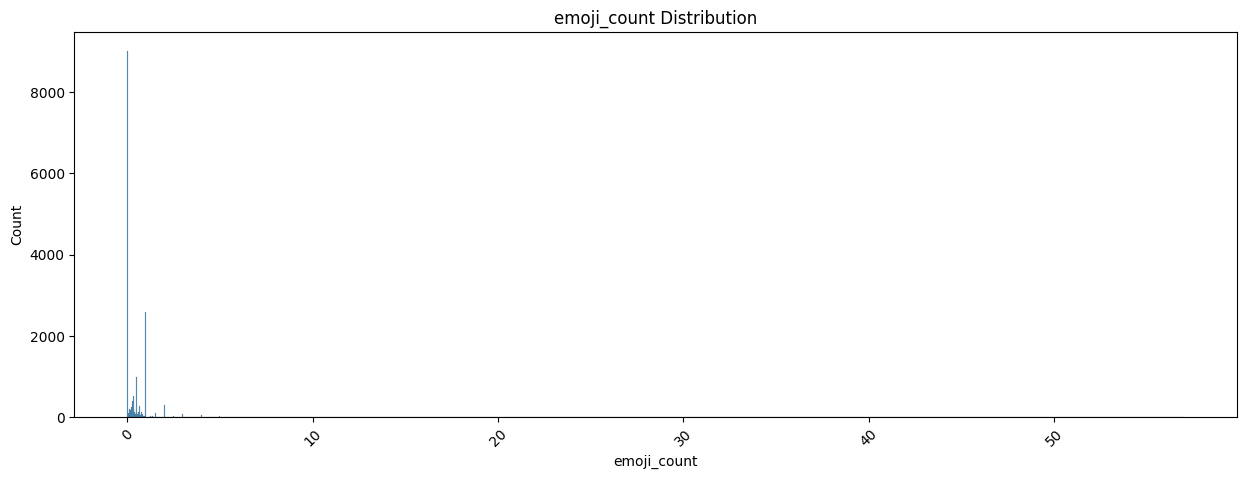

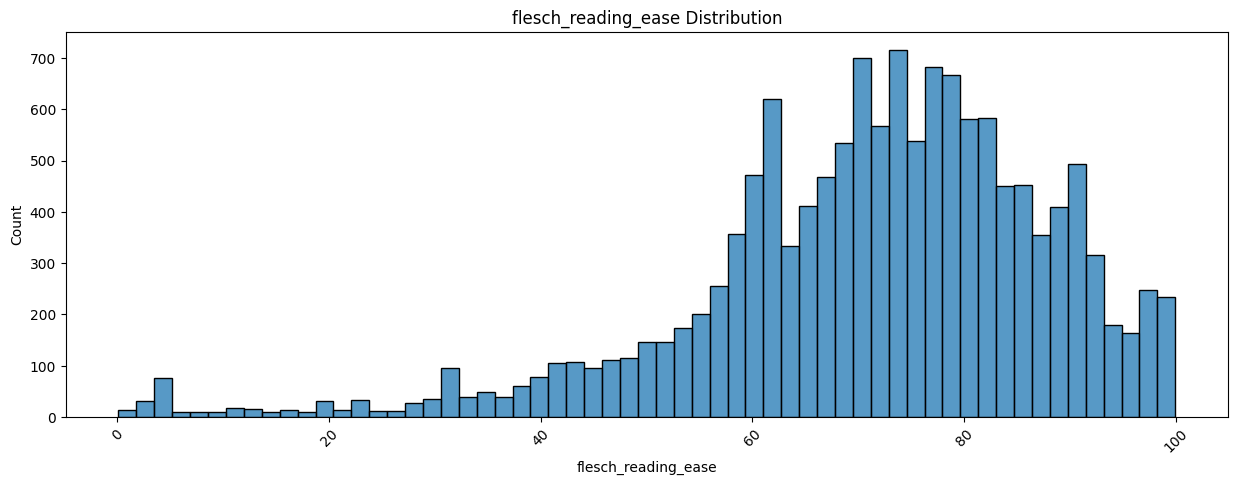

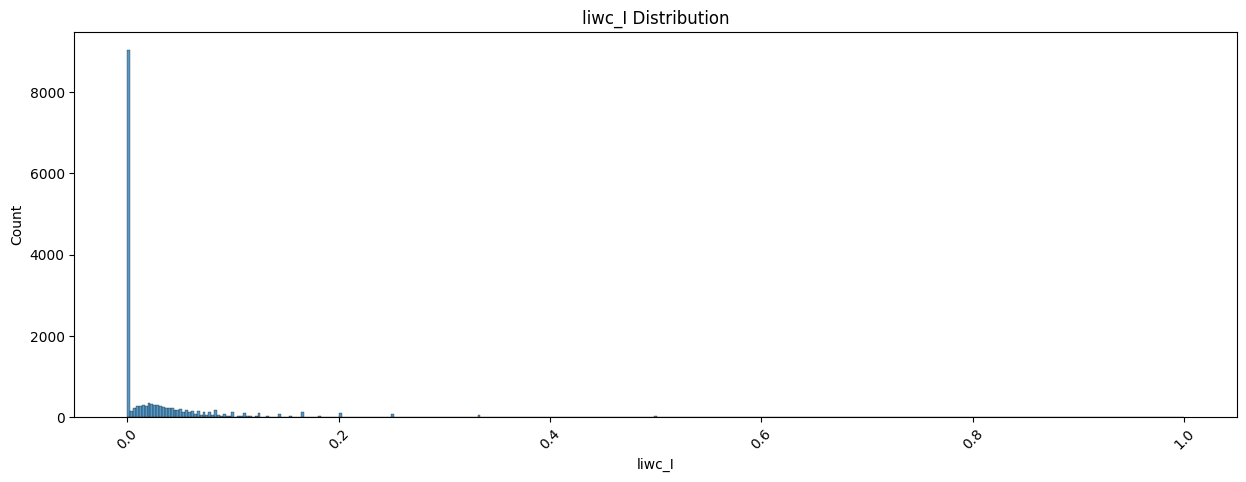

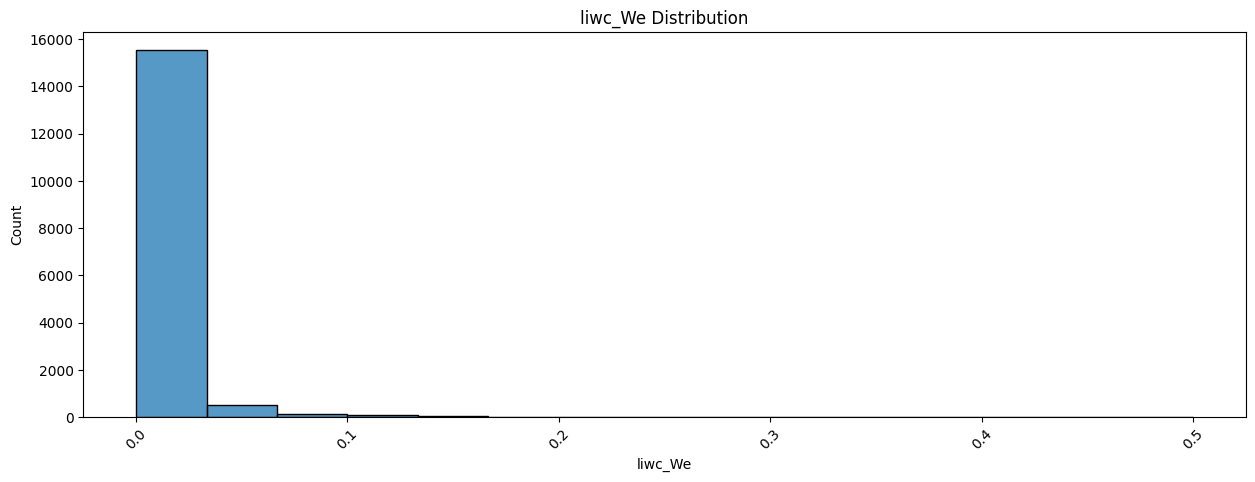

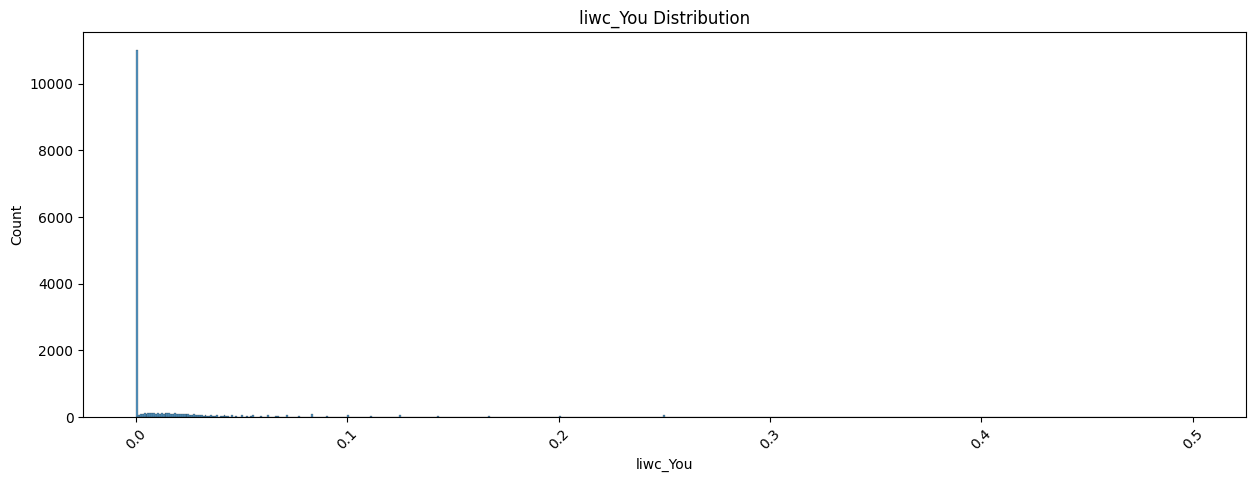

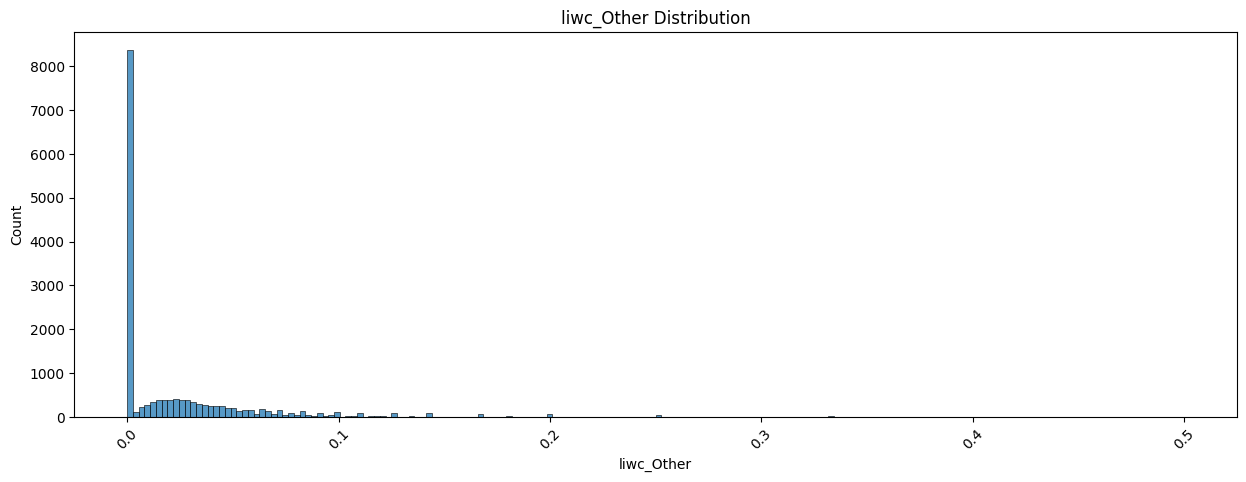

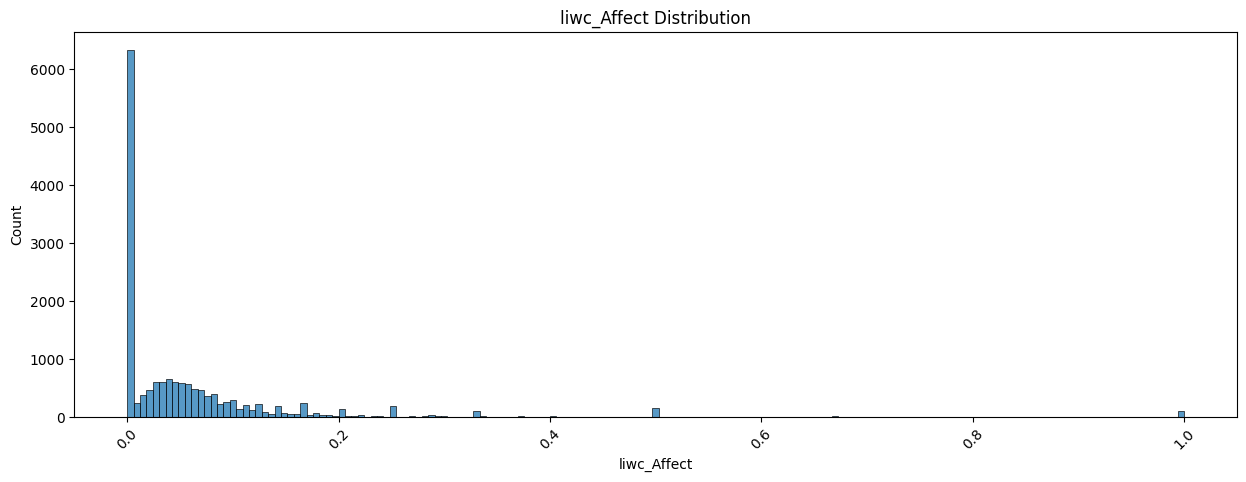

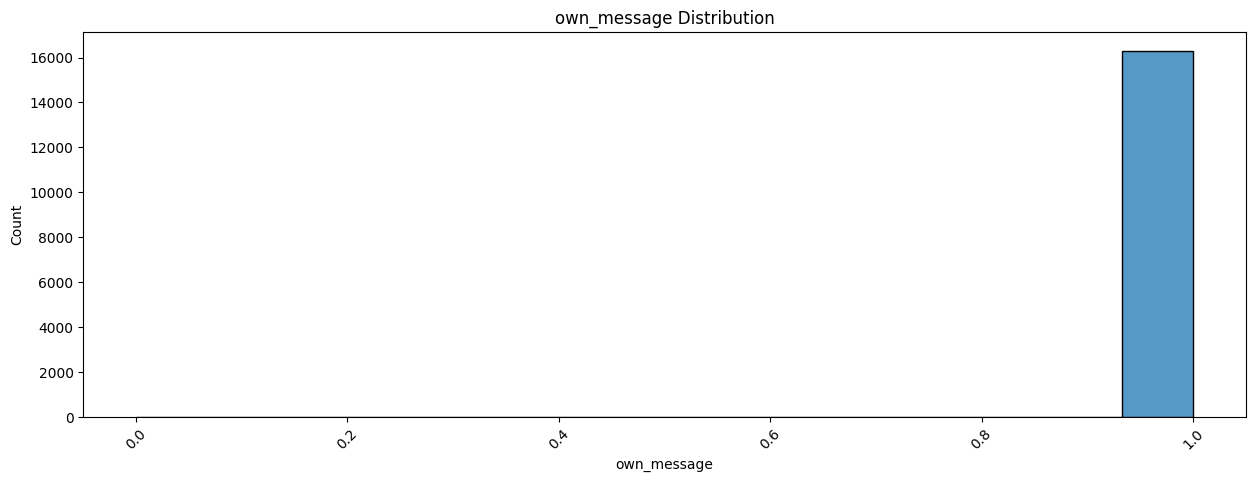

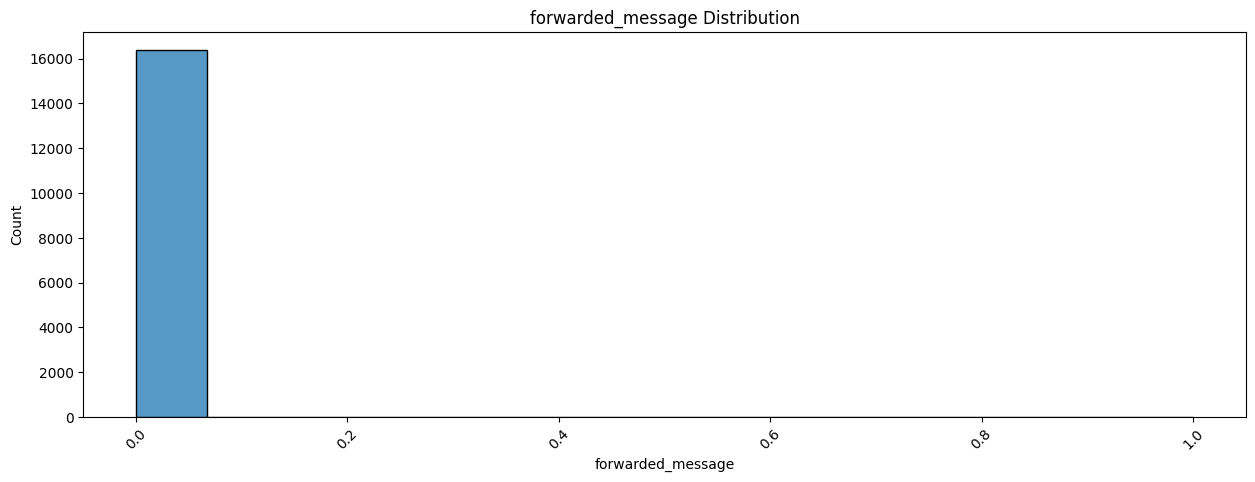

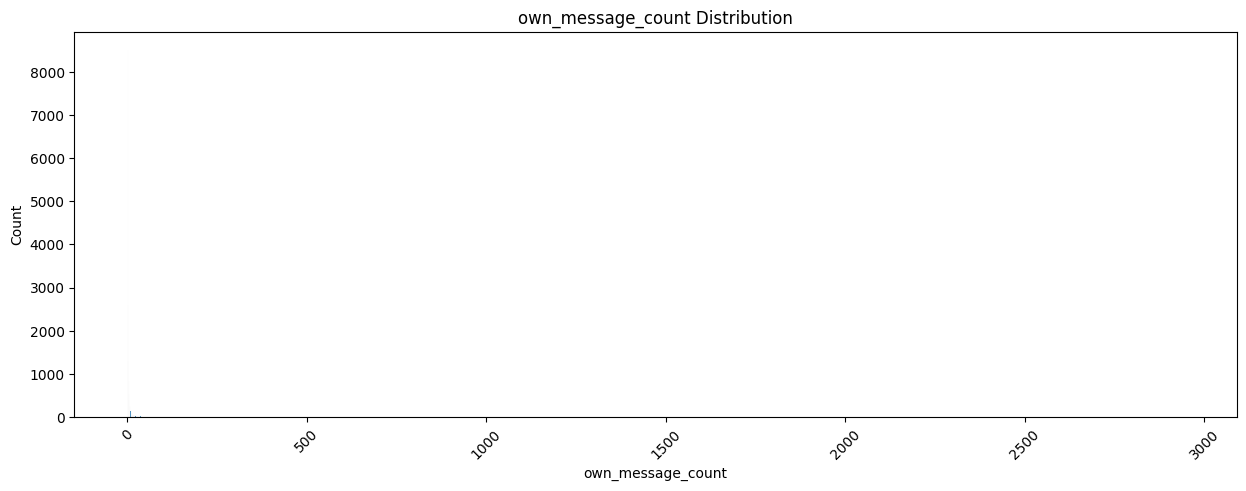

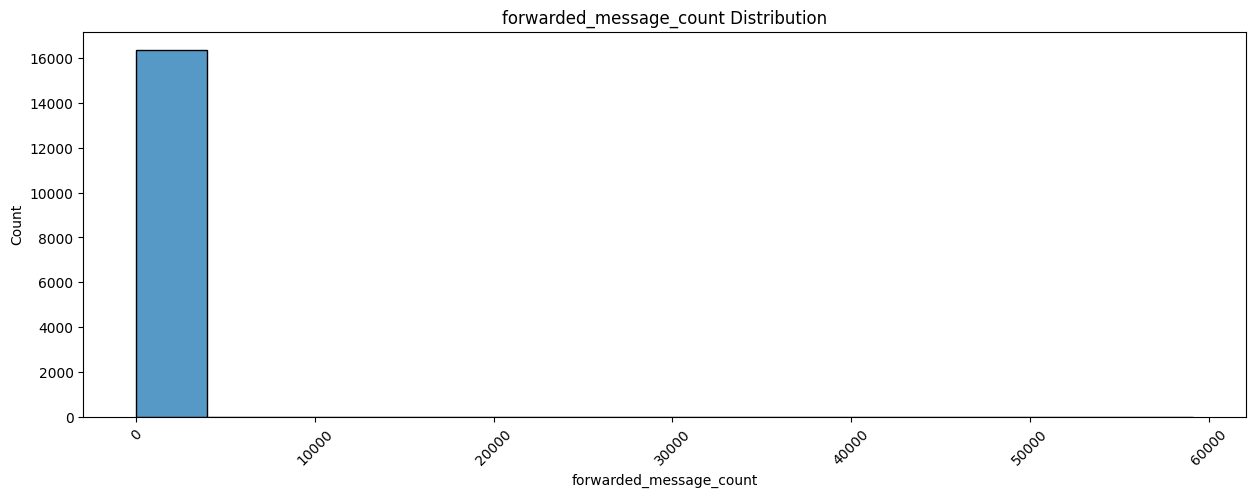

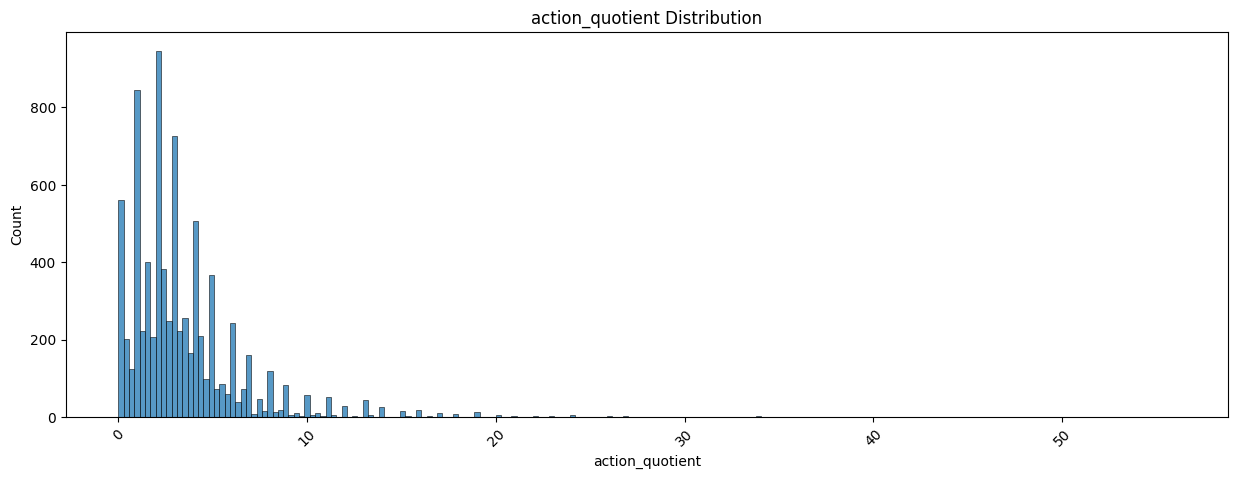

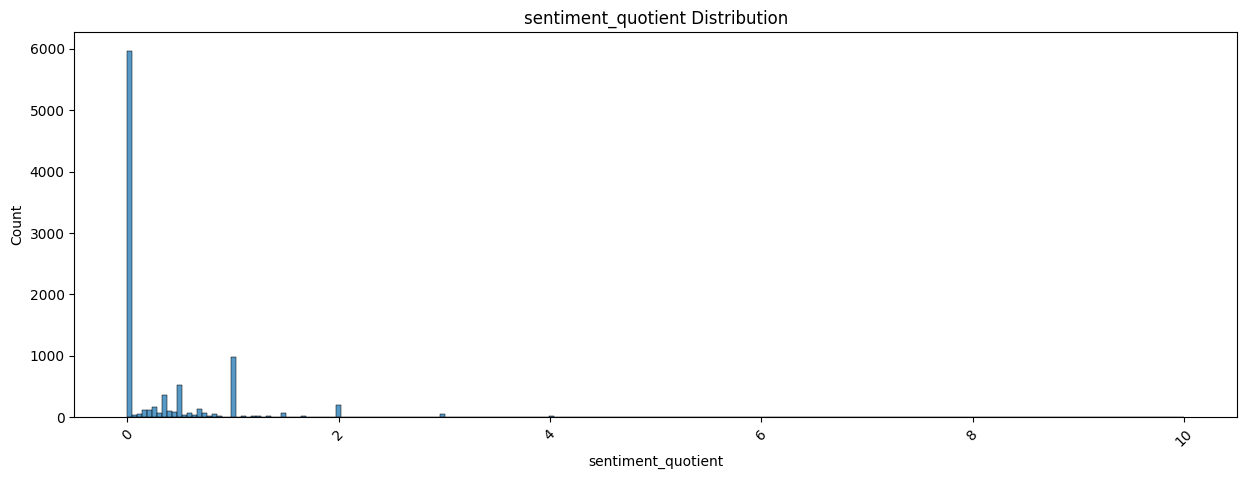

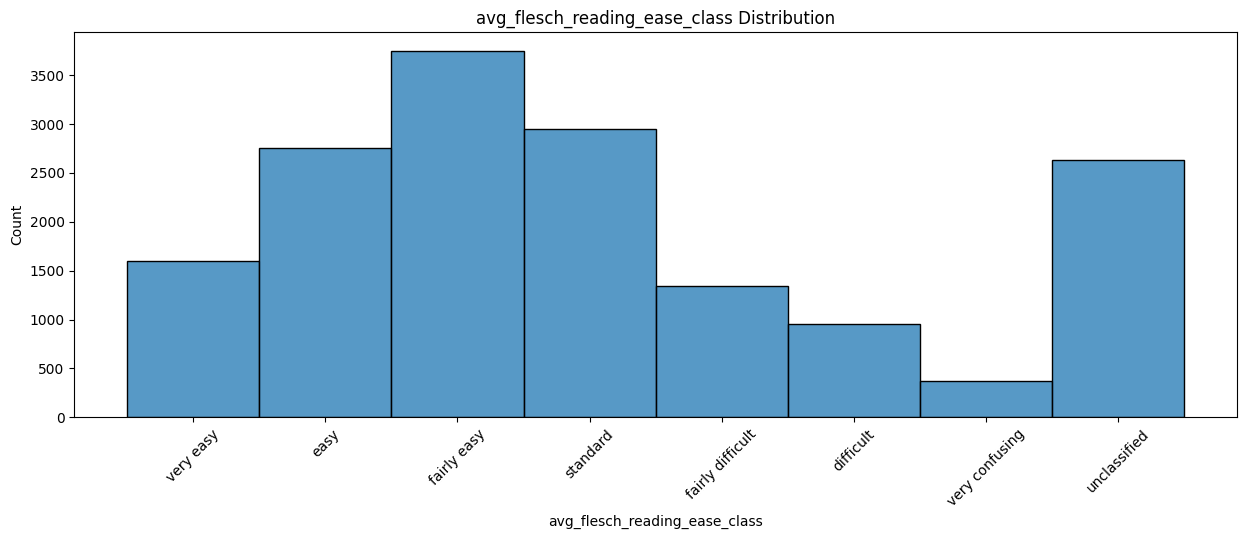

In [11]:
#plot distribution of all columns
for col in cols:
    plt.figure(figsize=(15, 5))
    if col == 'avg_flesch_reading_ease_class':
        label_order = ['very easy', 'easy', 'fairly easy', 'standard', 'fairly difficult', 'difficult', 'very confusing', 'unclassified']
        authors['avg_flesch_reading_ease_class'] = pd.Categorical(authors['avg_flesch_reading_ease_class'], categories=label_order, ordered=True)
    sns.histplot(data=authors, x = col)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
    plt.show()